In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/raw/ebi_base_customers.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
3,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
4,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9000 non-null   int64  
 1   credit_score      9000 non-null   int64  
 2   country           9000 non-null   object 
 3   gender            9000 non-null   object 
 4   age               9000 non-null   int64  
 5   tenure            9000 non-null   int64  
 6   balance           9000 non-null   float64
 7   products_number   9000 non-null   int64  
 8   credit_card       9000 non-null   int64  
 9   active_member     9000 non-null   int64  
 10  estimated_salary  9000 non-null   float64
 11  churn             9000 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 843.9+ KB


In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,1.569101e+07,650.386778,38.935000,5.011111,76649.866226,1.528889,0.705000,0.514667,100507.323986,0.203556
std,7.204001e+04,96.578423,10.454538,2.892966,62358.961844,0.580883,0.456068,0.499813,57534.940752,0.402665
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562866e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51446.617500,0.000000
50%,1.569051e+07,652.000000,37.000000,5.000000,97262.675000,1.000000,1.000000,1.000000,100444.875000,0.000000
75%,1.575377e+07,717.000000,44.000000,7.000000,127574.692500,2.000000,1.000000,1.000000,149669.932500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt



IQR for credit score: 133.0
Lower bound: 384.5


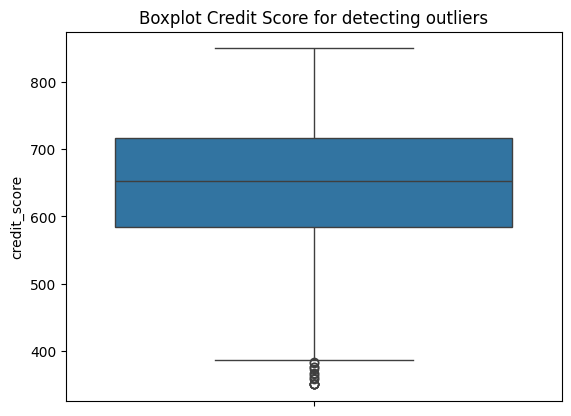

In [6]:
sns.boxplot(data=df['credit_score'])
plt.title("Boxplot Credit Score for detecting outliers")
Q1 = df['credit_score'].quantile(0.25)
Q3 = df['credit_score'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR for credit score: {IQR}")
lower_bound = Q1 - 1.5 * IQR
print("Lower bound:", lower_bound)
outliers_lower_bound = df[df['credit_score'] < lower_bound]
df['credit_score'] = df['credit_score'].clip(lower= lower_bound)
plt.show()



Text(0.5, 1.0, 'Boxplot Credit Score without outliers')

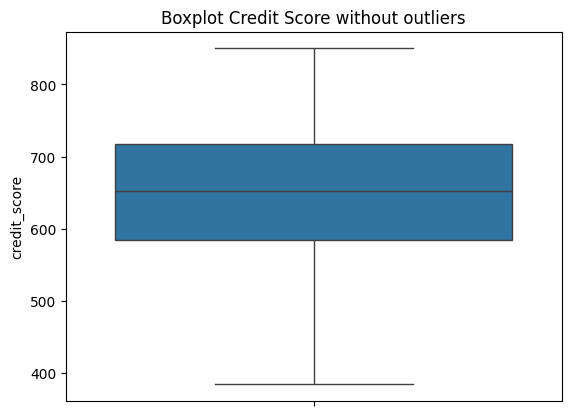

In [7]:
sns.boxplot(data=df['credit_score'])
plt.title("Boxplot Credit Score without outliers")

In [8]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,1.569101e+07,650.425556,38.935000,5.011111,76649.866226,1.528889,0.705000,0.514667,100507.323986,0.203556
std,7.204001e+04,96.465908,10.454538,2.892966,62358.961844,0.580883,0.456068,0.499813,57534.940752,0.402665
min,1.556570e+07,384.500000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562866e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51446.617500,0.000000
50%,1.569051e+07,652.000000,37.000000,5.000000,97262.675000,1.000000,1.000000,1.000000,100444.875000,0.000000
75%,1.575377e+07,717.000000,44.000000,7.000000,127574.692500,2.000000,1.000000,1.000000,149669.932500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


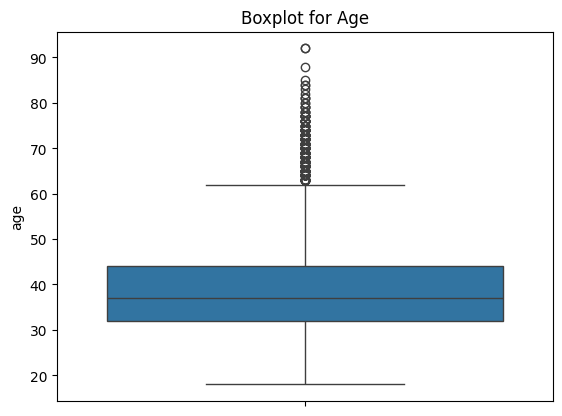

In [9]:
sns.boxplot(df['age'])
plt.title("Boxplot for Age")
plt.show()

In [10]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
higher_bound = Q3 + 1.5 * IQR
print(higher_bound)



62.0


In [11]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,1.569101e+07,650.425556,38.935000,5.011111,76649.866226,1.528889,0.705000,0.514667,100507.323986,0.203556
std,7.204001e+04,96.465908,10.454538,2.892966,62358.961844,0.580883,0.456068,0.499813,57534.940752,0.402665
min,1.556570e+07,384.500000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562866e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51446.617500,0.000000
50%,1.569051e+07,652.000000,37.000000,5.000000,97262.675000,1.000000,1.000000,1.000000,100444.875000,0.000000
75%,1.575377e+07,717.000000,44.000000,7.000000,127574.692500,2.000000,1.000000,1.000000,149669.932500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


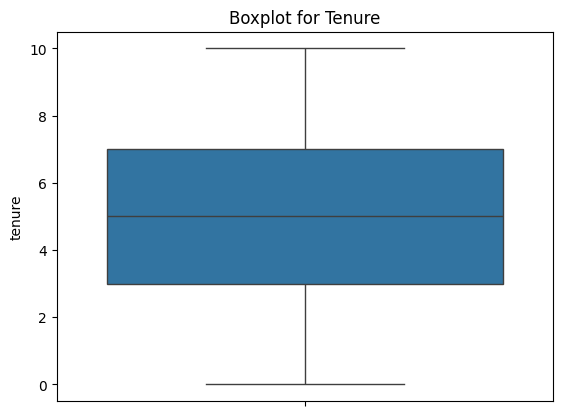

In [12]:
sns.boxplot(df['tenure'])
plt.title('Boxplot for Tenure')
plt.show()

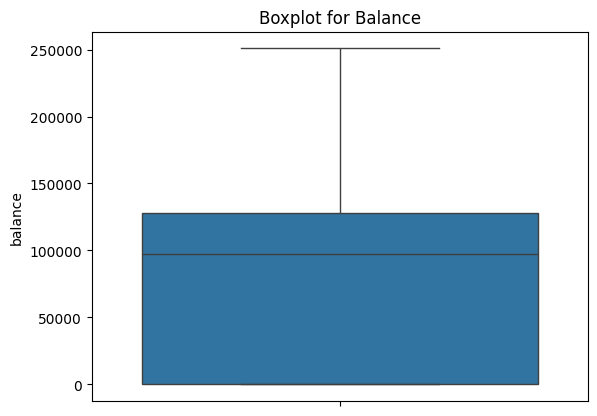

In [13]:
sns.boxplot(df['balance'])
plt.title('Boxplot for Balance')
plt.show()

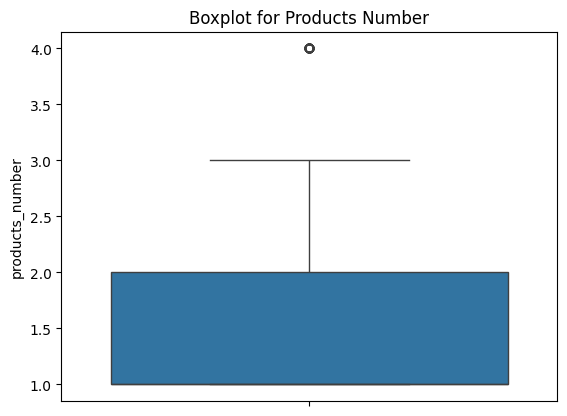

In [14]:
sns.boxplot(df['products_number'])
plt.title('Boxplot for Products Number')
plt.show()

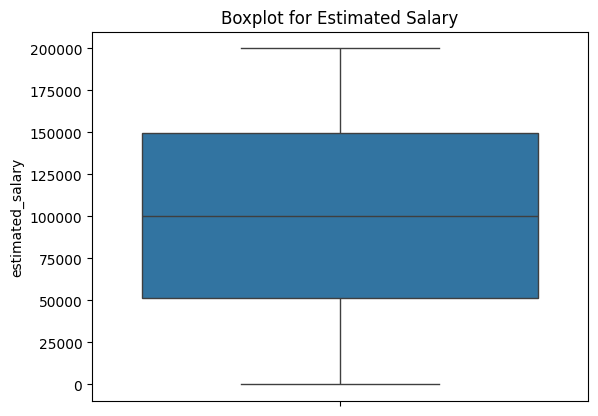

In [15]:
sns.boxplot(df['estimated_salary'])
plt.title('Boxplot for Estimated Salary')
plt.show()

In [16]:
df.describe(include='all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,9.000000e+03,9000.000000,9000,9000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4508,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569101e+07,650.425556,NaN,NaN,38.935000,5.011111,76649.866226,1.528889,0.705000,0.514667,100507.323986,0.203556
std,7.204001e+04,96.465908,NaN,NaN,10.454538,2.892966,62358.961844,0.580883,0.456068,0.499813,57534.940752,0.402665
min,1.556570e+07,384.500000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562866e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51446.617500,0.000000
50%,1.569051e+07,652.000000,NaN,NaN,37.000000,5.000000,97262.675000,1.000000,1.000000,1.000000,100444.875000,0.000000
75%,1.575377e+07,717.000000,NaN,NaN,44.000000,7.000000,127574.692500,2.000000,1.000000,1.000000,149669.932500,0.000000


In [17]:
df.dtypes

customer_id           int64
credit_score        float64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [18]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [19]:
df['country'].value_counts()

country
France     4508
Germany    2264
Spain      2228
Name: count, dtype: int64

In [20]:
df['country'].isnull().sum()

np.int64(0)

In [21]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [22]:
df['gender'].value_counts()

gender
Male      4900
Female    4100
Name: count, dtype: int64

In [23]:
df['gender'].isnull().sum()

np.int64(0)

In [24]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15701354,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
3,15737888,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
4,15574012,645.0,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,15719294,800.0,France,Female,29,2,0.00,2,0,0,167773.55,0
8996,15569892,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0
8997,15584532,709.0,France,Female,36,7,0.00,1,0,1,42085.58,1
8998,15682355,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [27]:
### Encoding

print(df['country'].value_counts())
print(df['gender'].value_counts())

country
France     4508
Germany    2264
Spain      2228
Name: count, dtype: int64
gender
Male      4900
Female    4100
Name: count, dtype: int64


In [28]:
map_gender = {
    'Male': 1,
    'Female': 0
}

df['gender'] = df['gender'].map(map_gender)
df = pd.get_dummies(df, columns=['country'], drop_first=True)
df

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,619.0,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,608.0,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,15701354,699.0,0,39,1,0.00,2,0,0,93826.63,0,False,False
3,15737888,850.0,0,43,2,125510.82,1,1,1,79084.10,0,False,True
4,15574012,645.0,1,44,8,113755.78,2,1,0,149756.71,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,15719294,800.0,0,29,2,0.00,2,0,0,167773.55,0,False,False
8996,15569892,516.0,1,35,10,57369.61,1,1,1,101699.77,0,False,False
8997,15584532,709.0,0,36,7,0.00,1,0,1,42085.58,1,False,False
8998,15682355,772.0,1,42,3,75075.31,2,1,0,92888.52,1,True,False
